[1] 14848

[1] 14848

[1] 2468

[1] 3514

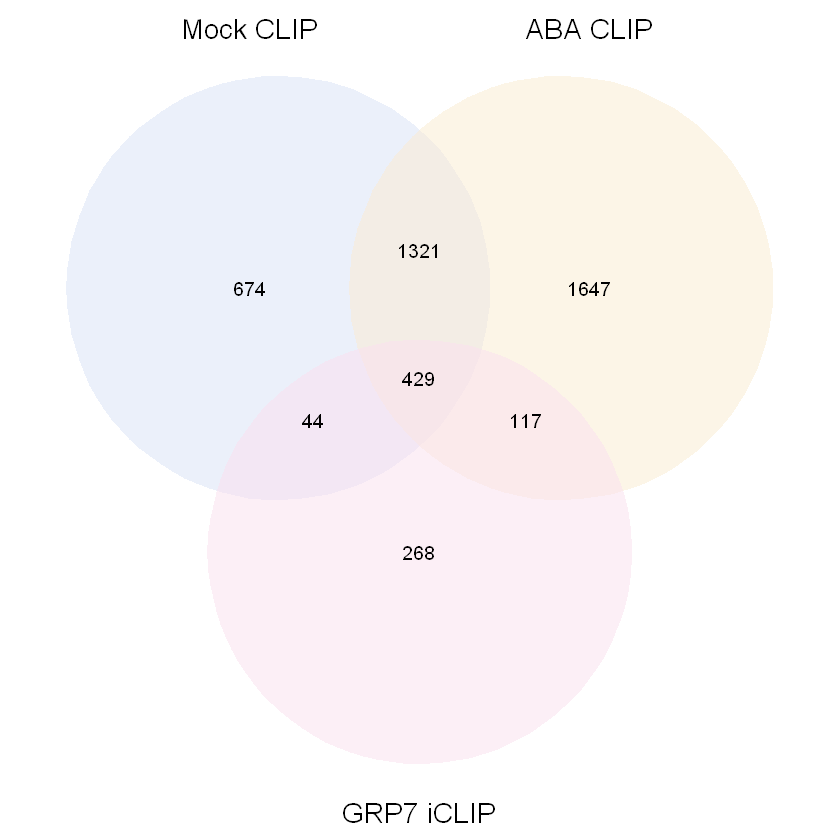

In [22]:
library(ggvenn)

mock_clip = read.csv("data/CLIP_mock.txt",header=T,sep="\t")
aba_clip = read.csv("data/CLIP_ABA.txt",header=T,sep="\t")
GRP7_iclip = read.csv("data/GRP7_iCLIP.txt",header=F,sep="\t")

mock_clip = subset(mock_clip, mock_clip$annotation!='Promoter')
aba_clip = subset(aba_clip, aba_clip$annotation!='Promoter')

#head(mock_clip)
#head(aba_clip)
#head(GRP7_iclip)

# filter sum of abundance rpkm <=1
rawdata =read.csv("data/fpkm_mean.txt",header=T,sep="\t",row.names=1)
rawdata$mock_sum = rawdata[,3] + rawdata[,4] + rawdata[,7] + rawdata[,8]
rawdata$aba_sum = rawdata[,1] + rawdata[,2] + rawdata[,5] + rawdata[,6]
mock_high_abundance = rownames(subset(rawdata,rawdata$mock_sum>=1))
aba_high_abundance = rownames(subset(rawdata,rawdata$aba_sum>=1))
length(mock_high_abundance)
#[1] 14848
length(aba_high_abundance)
#[1] 14848


mock_clip_ID = intersect(mock_clip$Gene.ID,mock_high_abundance)
aba_clip_ID = intersect(aba_clip$Gene.ID,aba_high_abundance)

length(mock_clip_ID)
#[1] 2831
length(aba_clip_ID)
#[1] 3985

data <- list(
  "Mock CLIP" = mock_clip_ID,
  "ABA CLIP" = aba_clip_ID,
  "GRP7 iCLIP" = GRP7_iclip$V1
)

#pdf("Sup_fig7_venn.pdf", width=4, height=4)
ggvenn(data,show_percentage = F,stroke_color = NA,fill_color = c("#d7e1f5","#faebd0","#fadfee"))
#dev.off()